In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as ac
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train= pd.read_csv("SalaryData_Train.csv")
df_test = pd.read_csv("SalaryData_Test.csv")

In [3]:
def get_standardized_data(data):
    df_norm = (data-data.min())/(data.max()-data.min())
    return(df_norm)

In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
lblen = LabelEncoder()
df_train["workclass"]=lblen.fit_transform(df_train["workclass"])
df_train["education"]=lblen.fit_transform(df_train["education"])
df_train["maritalstatus"]=lblen.fit_transform(df_train["maritalstatus"])
df_train["occupation"]=lblen.fit_transform(df_train["occupation"])
df_train["relationship"]=lblen.fit_transform(df_train["relationship"])
df_train["race"]=lblen.fit_transform(df_train["race"])
df_train["sex"]=lblen.fit_transform(df_train["sex"])
df_train["relationship"]=lblen.fit_transform(df_train["relationship"])
df_train["native"]=lblen.fit_transform(df_train["native"])
df_train["Salary"]=lblen.fit_transform(df_train["Salary"])
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [6]:
df_train["Salary"].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [7]:
df_train=get_standardized_data(df_train)
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718,0.0
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718,0.0
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718,0.0


In [8]:
df_test["workclass"]=lblen.fit_transform(df_test["workclass"])
df_test["education"]=lblen.fit_transform(df_test["education"])
df_test["maritalstatus"]=lblen.fit_transform(df_test["maritalstatus"])
df_test["occupation"]=lblen.fit_transform(df_test["occupation"])
df_test["relationship"]=lblen.fit_transform(df_test["relationship"])
df_test["race"]=lblen.fit_transform(df_test["race"])
df_test["sex"]=lblen.fit_transform(df_test["sex"])
df_test["relationship"]=lblen.fit_transform(df_test["relationship"])
df_test["native"]=lblen.fit_transform(df_test["native"])
df_test["Salary"]=lblen.fit_transform(df_test["Salary"])
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [9]:
df_test["Salary"].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [10]:
df_test=get_standardized_data(df_test)
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0.0
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0.0
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0.0
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0.0


In [11]:
df_train.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [12]:
df_train.drop_duplicates(inplace=True)
df_train.shape

(26903, 14)

In [13]:
print(df_train.isna().sum(),df_train.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [14]:
df_test.duplicated().value_counts()

False    14130
True       930
dtype: int64

In [15]:
df_test.drop_duplicates(inplace=True)
df_test.shape

(14130, 14)

In [16]:
print(df_train.isna().sum(),df_train.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [17]:
X_train = df_train.iloc[:,:-1]
Y_train = df_train.iloc[:,-1]

In [18]:
X_test = df_test.iloc[:,:-1]
Y_test = df_test.iloc[:,-1]

In [19]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [20]:
Y_pred = model.predict(X_test)

In [21]:
ac(Y_test,Y_pred)

0.7957537154989385

In [22]:
import itertools

In [23]:
acc=[]
for i in itertools.combinations(X_train.columns,r=4):
    model = GaussianNB()
    model.fit(X_train[list(i)],Y_train)
    Y_pred=model.predict(X_test[list(i)])
    acc.append(ac(Y_test,Y_pred))
    print("Accuracy of features "+str(i)+" is: "+str(ac(Y_test,Y_pred)))

Accuracy of features ('age', 'workclass', 'education', 'educationno') is: 0.7763623496107572
Accuracy of features ('age', 'workclass', 'education', 'maritalstatus') is: 0.7722576079263977
Accuracy of features ('age', 'workclass', 'education', 'occupation') is: 0.7409058740268931
Accuracy of features ('age', 'workclass', 'education', 'relationship') is: 0.7538570417551309
Accuracy of features ('age', 'workclass', 'education', 'race') is: 0.7334748761500354
Accuracy of features ('age', 'workclass', 'education', 'sex') is: 0.740552016985138
Accuracy of features ('age', 'workclass', 'education', 'capitalgain') is: 0.7861995753715499
Accuracy of features ('age', 'workclass', 'education', 'capitalloss') is: 0.7520877565463553
Accuracy of features ('age', 'workclass', 'education', 'hoursperweek') is: 0.7466383581033262
Accuracy of features ('age', 'workclass', 'education', 'native') is: 0.7377211606510969
Accuracy of features ('age', 'workclass', 'educationno', 'maritalstatus') is: 0.80828025

Accuracy of features ('age', 'education', 'sex', 'capitalloss') is: 0.7525831564048124
Accuracy of features ('age', 'education', 'sex', 'hoursperweek') is: 0.7529370134465676
Accuracy of features ('age', 'education', 'sex', 'native') is: 0.7427459306440198
Accuracy of features ('age', 'education', 'capitalgain', 'capitalloss') is: 0.7883227176220807
Accuracy of features ('age', 'education', 'capitalgain', 'hoursperweek') is: 0.786411889596603
Accuracy of features ('age', 'education', 'capitalgain', 'native') is: 0.7861995753715499
Accuracy of features ('age', 'education', 'capitalloss', 'hoursperweek') is: 0.7522292993630574
Accuracy of features ('age', 'education', 'capitalloss', 'native') is: 0.7524416135881105
Accuracy of features ('age', 'education', 'hoursperweek', 'native') is: 0.7542816702052371
Accuracy of features ('age', 'educationno', 'maritalstatus', 'occupation') is: 0.8142250530785563
Accuracy of features ('age', 'educationno', 'maritalstatus', 'relationship') is: 0.80184

Accuracy of features ('age', 'occupation', 'capitalgain', 'native') is: 0.7866949752300071
Accuracy of features ('age', 'occupation', 'capitalloss', 'hoursperweek') is: 0.7524416135881105
Accuracy of features ('age', 'occupation', 'capitalloss', 'native') is: 0.7524416135881105
Accuracy of features ('age', 'occupation', 'hoursperweek', 'native') is: 0.751521585279547
Accuracy of features ('age', 'relationship', 'race', 'sex') is: 0.7313517338995046
Accuracy of features ('age', 'relationship', 'race', 'capitalgain') is: 0.7859164897381458
Accuracy of features ('age', 'relationship', 'race', 'capitalloss') is: 0.7526539278131635
Accuracy of features ('age', 'relationship', 'race', 'hoursperweek') is: 0.7657466383581033
Accuracy of features ('age', 'relationship', 'race', 'native') is: 0.7650389242745931
Accuracy of features ('age', 'relationship', 'sex', 'capitalgain') is: 0.7866242038216561
Accuracy of features ('age', 'relationship', 'sex', 'capitalloss') is: 0.7526539278131635
Accurac

Accuracy of features ('workclass', 'educationno', 'occupation', 'relationship') is: 0.7813163481953291
Accuracy of features ('workclass', 'educationno', 'occupation', 'race') is: 0.7612172682236377
Accuracy of features ('workclass', 'educationno', 'occupation', 'sex') is: 0.7722576079263977
Accuracy of features ('workclass', 'educationno', 'occupation', 'capitalgain') is: 0.7869780608634112
Accuracy of features ('workclass', 'educationno', 'occupation', 'capitalloss') is: 0.7534324133050248
Accuracy of features ('workclass', 'educationno', 'occupation', 'hoursperweek') is: 0.7726822363765039
Accuracy of features ('workclass', 'educationno', 'occupation', 'native') is: 0.7581740976645436
Accuracy of features ('workclass', 'educationno', 'relationship', 'race') is: 0.7825194621372965
Accuracy of features ('workclass', 'educationno', 'relationship', 'sex') is: 0.7775654635527247
Accuracy of features ('workclass', 'educationno', 'relationship', 'capitalgain') is: 0.7866242038216561
Accurac

Accuracy of features ('workclass', 'relationship', 'capitalgain', 'capitalloss') is: 0.7886765746638358
Accuracy of features ('workclass', 'relationship', 'capitalgain', 'hoursperweek') is: 0.7856334041047417
Accuracy of features ('workclass', 'relationship', 'capitalgain', 'native') is: 0.7852795470629865
Accuracy of features ('workclass', 'relationship', 'capitalloss', 'hoursperweek') is: 0.7523000707714084
Accuracy of features ('workclass', 'relationship', 'capitalloss', 'native') is: 0.7525123849964614
Accuracy of features ('workclass', 'relationship', 'hoursperweek', 'native') is: 0.7498230714791224
Accuracy of features ('workclass', 'race', 'sex', 'capitalgain') is: 0.786411889596603
Accuracy of features ('workclass', 'race', 'sex', 'capitalloss') is: 0.7522292993630574
Accuracy of features ('workclass', 'race', 'sex', 'hoursperweek') is: 0.7374380750176929
Accuracy of features ('workclass', 'race', 'sex', 'native') is: 0.7196744515215853
Accuracy of features ('workclass', 'race'

Accuracy of features ('education', 'maritalstatus', 'capitalloss', 'native') is: 0.7526539278131635
Accuracy of features ('education', 'maritalstatus', 'hoursperweek', 'native') is: 0.7605803255484784
Accuracy of features ('education', 'occupation', 'relationship', 'race') is: 0.7429582448690729
Accuracy of features ('education', 'occupation', 'relationship', 'sex') is: 0.7401981599433829
Accuracy of features ('education', 'occupation', 'relationship', 'capitalgain') is: 0.7853503184713376
Accuracy of features ('education', 'occupation', 'relationship', 'capitalloss') is: 0.7526539278131635
Accuracy of features ('education', 'occupation', 'relationship', 'hoursperweek') is: 0.7633404104741685
Accuracy of features ('education', 'occupation', 'relationship', 'native') is: 0.745930644019816
Accuracy of features ('education', 'occupation', 'race', 'sex') is: 0.6922859164897381
Accuracy of features ('education', 'occupation', 'race', 'capitalgain') is: 0.7854918612880396
Accuracy of feature

Accuracy of features ('educationno', 'maritalstatus', 'capitalloss', 'native') is: 0.7777070063694268
Accuracy of features ('educationno', 'maritalstatus', 'hoursperweek', 'native') is: 0.8118188251946213
Accuracy of features ('educationno', 'occupation', 'relationship', 'race') is: 0.7769992922859165
Accuracy of features ('educationno', 'occupation', 'relationship', 'sex') is: 0.7832271762208068
Accuracy of features ('educationno', 'occupation', 'relationship', 'capitalgain') is: 0.7869072894550602
Accuracy of features ('educationno', 'occupation', 'relationship', 'capitalloss') is: 0.7634111818825194
Accuracy of features ('educationno', 'occupation', 'relationship', 'hoursperweek') is: 0.7941259731068648
Accuracy of features ('educationno', 'occupation', 'relationship', 'native') is: 0.7939136588818118
Accuracy of features ('educationno', 'occupation', 'race', 'sex') is: 0.7730360934182591
Accuracy of features ('educationno', 'occupation', 'race', 'capitalgain') is: 0.786553432413305

Accuracy of features ('maritalstatus', 'relationship', 'sex', 'hoursperweek') is: 0.7360226468506723
Accuracy of features ('maritalstatus', 'relationship', 'sex', 'native') is: 0.7232130219391366
Accuracy of features ('maritalstatus', 'relationship', 'capitalgain', 'capitalloss') is: 0.7900920028308563
Accuracy of features ('maritalstatus', 'relationship', 'capitalgain', 'hoursperweek') is: 0.7871196036801132
Accuracy of features ('maritalstatus', 'relationship', 'capitalgain', 'native') is: 0.786553432413305
Accuracy of features ('maritalstatus', 'relationship', 'capitalloss', 'hoursperweek') is: 0.7501061571125266
Accuracy of features ('maritalstatus', 'relationship', 'capitalloss', 'native') is: 0.7527246992215145
Accuracy of features ('maritalstatus', 'relationship', 'hoursperweek', 'native') is: 0.7497523000707714
Accuracy of features ('maritalstatus', 'race', 'sex', 'capitalgain') is: 0.786553432413305
Accuracy of features ('maritalstatus', 'race', 'sex', 'capitalloss') is: 0.752

Accuracy of features ('race', 'capitalgain', 'capitalloss', 'native') is: 0.7888181174805379
Accuracy of features ('race', 'capitalgain', 'hoursperweek', 'native') is: 0.7860580325548479
Accuracy of features ('race', 'capitalloss', 'hoursperweek', 'native') is: 0.7524416135881105
Accuracy of features ('sex', 'capitalgain', 'capitalloss', 'hoursperweek') is: 0.7893842887473461
Accuracy of features ('sex', 'capitalgain', 'capitalloss', 'native') is: 0.7898796886058033
Accuracy of features ('sex', 'capitalgain', 'hoursperweek', 'native') is: 0.7869780608634112
Accuracy of features ('sex', 'capitalloss', 'hoursperweek', 'native') is: 0.7523708421797594
Accuracy of features ('capitalgain', 'capitalloss', 'hoursperweek', 'native') is: 0.7861995753715499


In [24]:
round(np.max(acc),4)

0.8155

Seeing the distribution of each of the 4 features('age', 'educationno', 'maritalstatus', 'native') wrt to y and corresponding normal distributions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='age'>

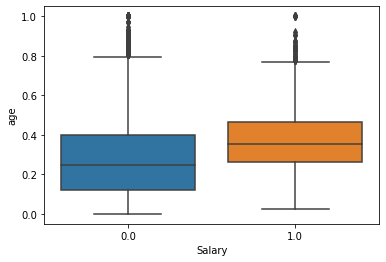

In [42]:
sns.boxplot(Y_train,X_train['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


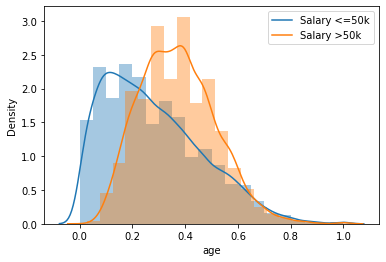

In [58]:
sns.distplot(df_train[df_train['Salary']==0]['age'],norm_hist=True,bins=20)
sns.distplot(df_train[df_train['Salary']==1]['age'],norm_hist=True,bins=20)
plt.legend(['Salary <=50k','Salary >50k'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='educationno'>

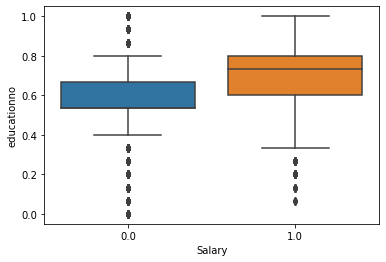

In [44]:
sns.boxplot(Y_train,X_train['educationno'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


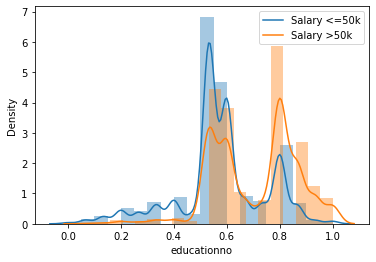

In [59]:
sns.distplot(df_train[df_train['Salary']==0]['educationno'],norm_hist=True,bins=20)
sns.distplot(df_train[df_train['Salary']==1]['educationno'],norm_hist=True,bins=20)
plt.legend(['Salary <=50k','Salary >50k'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

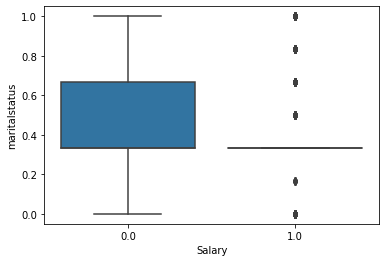

In [46]:
sns.boxplot(Y_train,X_train['maritalstatus'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


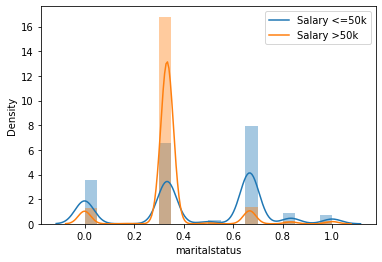

In [60]:
sns.distplot(df_train[df_train['Salary']==0]['maritalstatus'],norm_hist=True,bins=20)
sns.distplot(df_train[df_train['Salary']==1]['maritalstatus'],norm_hist=True,bins=20)
plt.legend(['Salary <=50k','Salary >50k'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='native'>

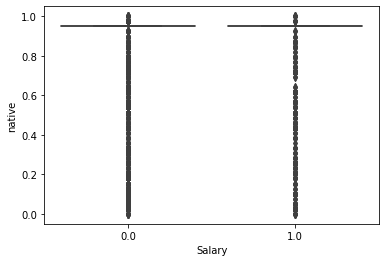

In [48]:
sns.boxplot(Y_train,X_train['native'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


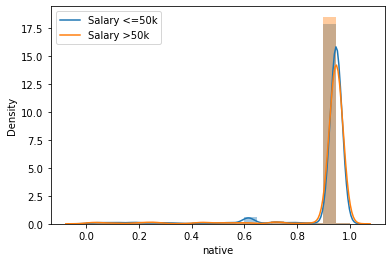

In [61]:
sns.distplot(df_train[df_train['Salary']==0]['native'],norm_hist=True,bins=20)
sns.distplot(df_train[df_train['Salary']==1]['native'],norm_hist=True,bins=20)
plt.legend(['Salary <=50k','Salary >50k'])

# Hence we build a Naive Bayes model with features ('age', 'educationno', 'maritalstatus', 'native') with accuracy 0.8155